In [68]:
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [24]:
def ReadData(tsv_file):
  data = pd.read_csv(tsv_file, sep="\t", header=0)
  return data

In [50]:
data = ReadData("A2_training_dataset.tsv")
print(data.shape)
X_train, X_test, y_train, y_test = \
    train_test_split(data.iloc[:, :-1].values, data.iloc[:, -1:].values, test_size=0.1)

(3816, 72)


In [69]:
def KFoldCV(model, data_X, data_y, k):
  kf = KFold(n_splits=k, shuffle=True)
  for train_index, test_index in kf.split(data_X):
    train_X = data_X[train_index]
    train_y = data_y[train_index]
    test_X, test_y = data_X[test_index], data_y[test_index]
    model.fit(train_X, train_y)
    score = model.score(test_X, test_y)
    print('accuracy:{}'.format(score))

In [35]:
clf = SVC(probability=True)
clf.fit(X_train, y_train.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [36]:
y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test.ravel()))

0.9083769633507853


In [64]:
param_grid = {'kernel': ['rbf', 'linear', 'poly']}
clf = SVC()
GS = GridSearchCV(clf, param_grid, cv=10)
GS.fit(X_train, y_train.ravel())
print(GS.best_params_)
print(GS.best_score_)

C:\Users\oscar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'sigmod' is not in list

  FitFailedWarning)
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'sigmod' is not in list

  FitFailedWarning)
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'sigmod' is not in list

  FitFailedWarning)
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these pa

{'kernel': 'rbf'}
0.9152586616041767


In [67]:
param_grid = {
    'C': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'gamma': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000],
}
clf = SVC(kernel='rbf')
GS = GridSearchCV(clf, param_grid, cv=10)
GS.fit(X_train, y_train.ravel())
print(GS.best_params_)
print(GS.best_score_)

{'C': 11, 'gamma': 1e-05}
0.9251601803512102


In [77]:
clf = SVC(kernel='rbf', C=11, gamma=0.00001)
KFoldCV(clf, X_train, y_train.ravel(), 10)

accuracy:0.9069767441860465
accuracy:0.938953488372093
accuracy:0.938953488372093
accuracy:0.9098837209302325
accuracy:0.9446064139941691
accuracy:0.9212827988338192
accuracy:0.9271137026239067
accuracy:0.9358600583090378
accuracy:0.9125364431486881
accuracy:0.9154518950437318


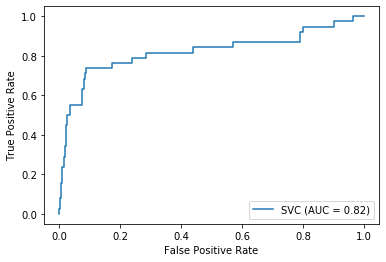

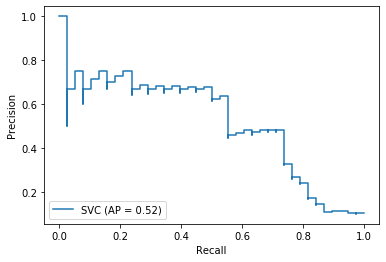

In [32]:
def GraphicalPerformance(model):
    metrics.plot_roc_curve(model, X_test, y_test.ravel())
    metrics.plot_precision_recall_curve(clf, X_test, y_test.ravel())
    plt.show()

In [53]:
rfc = RandomForestClassifier(n_estimators=10,random_state=90)
score = cross_val_score(rfc, X_train, y_train.ravel(), cv=10).mean()
score

0.9210878703640925

0.9327344226727234 161


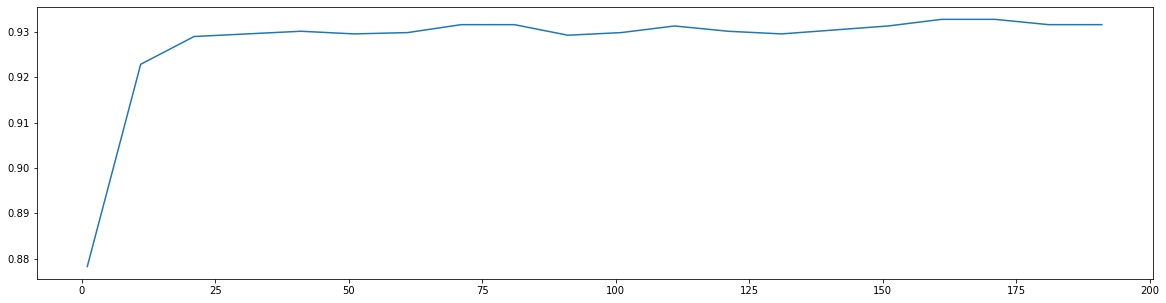

In [54]:
scores = []
for i in range(0, 200, 10):
    rfc = RandomForestClassifier(n_estimators = i+1, n_jobs=-1, random_state=90)
    score = cross_val_score(rfc, X_train, y_train.ravel(), cv=10).mean()
    scores.append(score)
print(max(scores), scores.index(max(scores))*10+1)
plt.figure(figsize=[20, 5])
plt.plot(range(1, 201, 10), scores)
plt.show()

In [58]:
param_grid = {'max_depth':np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators = 161, random_state=90)
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(X_train, y_train.ravel())
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 17}
0.9321521798088007


In [59]:
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}
rfc = RandomForestClassifier(n_estimators = 161, max_depth=17, random_state=90)
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(X_train, y_train.ravel())
print(GS.best_params_)
print(GS.best_score_)

{'min_samples_leaf': 1}
0.9321521798088007


In [62]:
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RandomForestClassifier(n_estimators = 161, max_depth=17, min_samples_leaf=1, random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(X_train, y_train.ravel())
print(GS.best_params_)
print(GS.best_score_)

{'min_samples_split': 2}
0.9321521798088007


In [63]:
param_grid = {'criterion':['gini', 'entropy']}
rfc = RandomForestClassifier(n_estimators = 161, max_depth=17, min_samples_leaf=1, random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(X_train, y_train.ravel())
print(GS.best_params_)
print(GS.best_score_)

{'criterion': 'gini'}
0.9321521798088007


In [78]:
rfc = RandomForestClassifier(n_estimators = 161, max_depth=17, min_samples_leaf=1, criterion='gini', min_samples_split=2, random_state=90)
KFoldCV(clf, X_train, y_train.ravel(), 10)

accuracy:0.9186046511627907
accuracy:0.9273255813953488
accuracy:0.9069767441860465
accuracy:0.936046511627907
accuracy:0.9183673469387755
accuracy:0.9358600583090378
accuracy:0.9329446064139941
accuracy:0.9300291545189504
accuracy:0.9358600583090378
accuracy:0.9037900874635568


In [105]:
# final SVM model
clf = SVC(probability=True, kernel='rbf', C=11, gamma=0.00001)
clf.fit(data.iloc[:, :-1].values, data.iloc[:, -1:].values.ravel())
A5_X = ReadData("A5_test_dataset.tsv")
A5_p = clf.predict_proba(A5_X)
with open('A5_predictions_group47.txt', 'w') as f:    
    for i in range(A5_p.shape[0]):
        f.write(str(A5_p[i][1])+"\n")